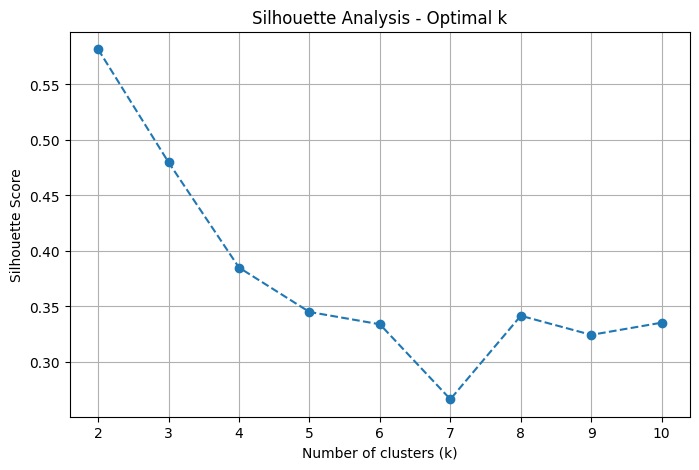

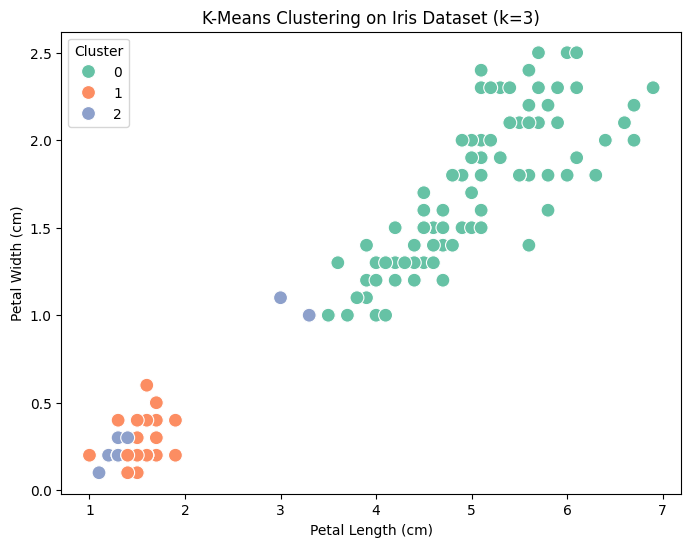

Cluster Centers (Scaled):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.571004         -0.371768           0.691119          0.663152
1          -0.816231          1.318958          -1.286834         -1.219712
2          -1.327654         -0.373138          -1.137236         -1.114862

Cluster Summary (Original Features):
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 6.314583          2.895833           4.973958   
1                 5.169697          3.630303           1.493939   
2                 4.747619          2.895238           1.757143   

         petal width (cm)  
Cluster                    
0                1.703125  
1                0.272727  
2                0.352381  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns


iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Analysis - Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

X['Cluster'] = cluster_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X.iloc[:, 2], y=X.iloc[:, 3],
    hue=X['Cluster'], palette='Set2', s=100
)
plt.title('K-Means Clustering on Iris Dataset (k=3)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Cluster')
plt.show()

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=iris.feature_names)

cluster_summary = X.groupby('Cluster').mean()

print("Cluster Centers (Scaled):")
print(cluster_centers)

print("\nCluster Summary (Original Features):")
print(cluster_summary)


